# Credit Card User Segmentation
In this case study, I will analyze the data of credit card users with clustering analysis using the K-Means algorithm. Elbow Method will be used to find the optimal number of clusters in the K-means algorithm. Besides that, I apply Principal Component Analysis (PCA) to simplify data, by transforming the data linearly. Lastly, I reduce dimensionality using Autoencoders. In that dataset, there are seventeen columns of data, that is:

CUSTID : Identification of Credit Card holder\
BALANCE : Balance amount left in customer's account to make purchases\
BALANCE_FREQUENCY : How frequently the Balance is update, score between 0 and 1 (1=frequently update, 0=not frequently updated)\
PURCHASES : Amount of purchases made from account\
ONEOFFPURCHASES : Maximum purchases amount done in one-go\
INSTALLMENTS_PURCHASES : Amount of purchases done in installment\
CASH_ADVANCE : Cash in advance given by the use
PURCHASES_FEQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1=frequently purchased, 0=not frequently purchased)\
PURCHASED_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1=frequently purchased, 0=not frequently purchased)\
ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1=frequently purchased, 0=not frequently purchased)\
PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1=frequently done, 0=not frequently done)\
CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid\
CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advance"\
PURCHASE_TRX : Number of purchase transactions made\
CREDIT_LIMIT : Limit of Credit Card for user\
PAYMENTS : Amount of Payment done by use\
MINIMUM_PAYMENTS : Minimum amount of payments made by user\
PRC_FULL_PAYMENT : Percent of full payment paid by user\
TENURE : Tenur of credit card servise for user

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
cc = pd.read_csv('Marketing_data.csv')

In [3]:
cc

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
cc[cc['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
cc[cc['CASH_ADVANCE'] == cc['CASH_ADVANCE'].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


In [8]:
cc.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
cc.loc[(cc['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = cc['MINIMUM_PAYMENTS'].mean()
cc.loc[(cc['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = cc['CREDIT_LIMIT'].mean()

In [10]:
cc.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
cc.duplicated().sum()

0

In [12]:
cc.drop("CUST_ID", axis = 1, inplace= True)

In [13]:
cc

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
n = len(cc.columns)
n

17

C:\Users\acer\anaconda3\envs\py3-TF2.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\envs\py3-TF2.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\acer\anaconda3\envs\py3-TF2.2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

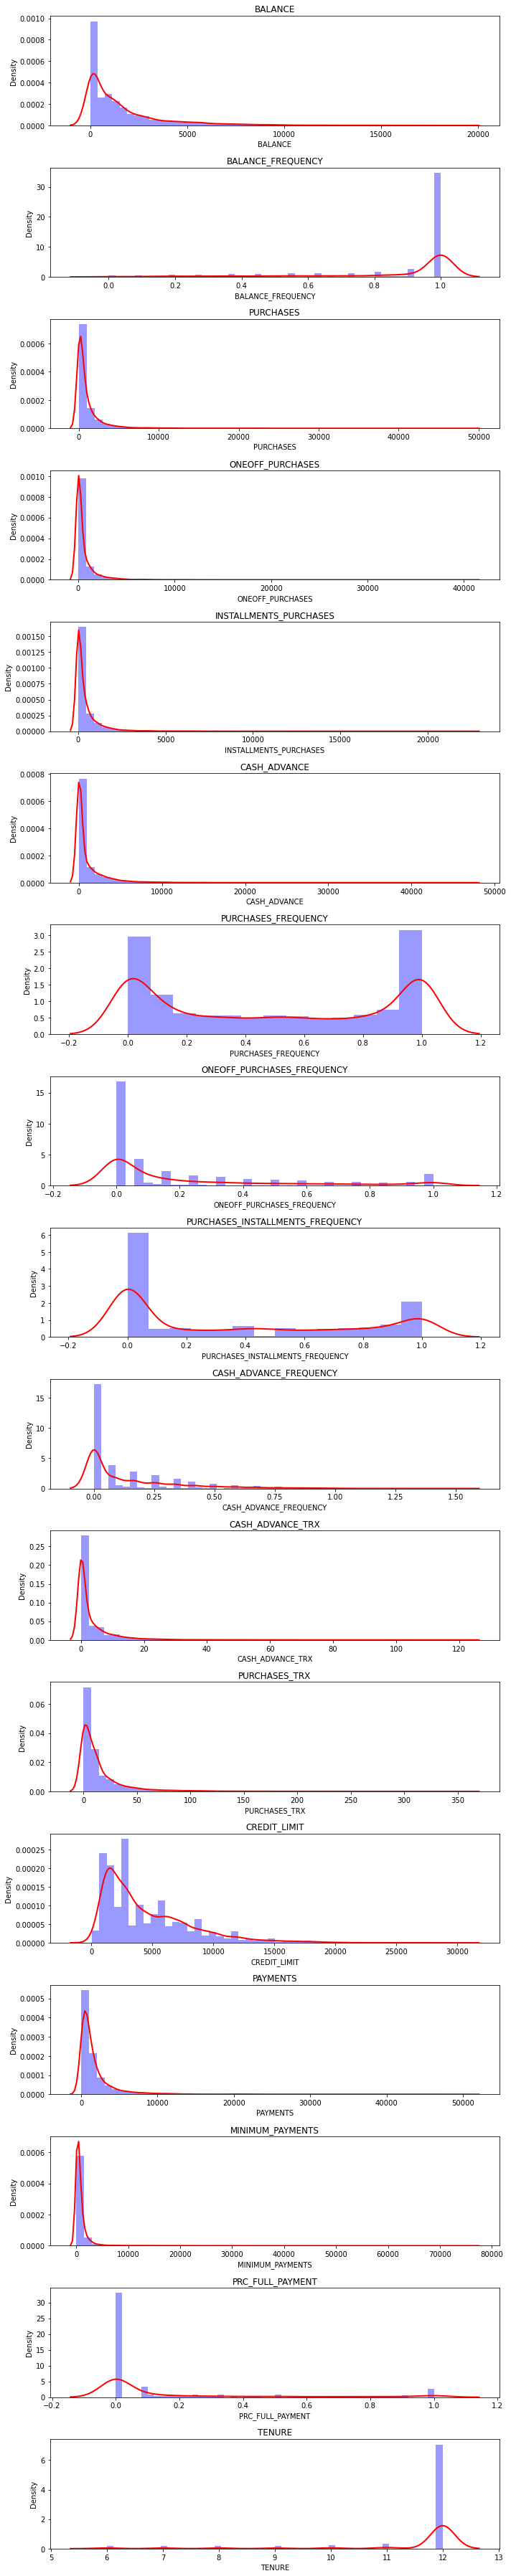

In [15]:
plt.figure(figsize=(10,50))
for i in range(len(cc.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(cc[cc.columns[i]], kde_kws={"color": "r", "lw": 2, "label": "KDE"}, hist_kws={"color": "b"})
  plt.title(cc.columns[i])

plt.tight_layout()

<AxesSubplot:>

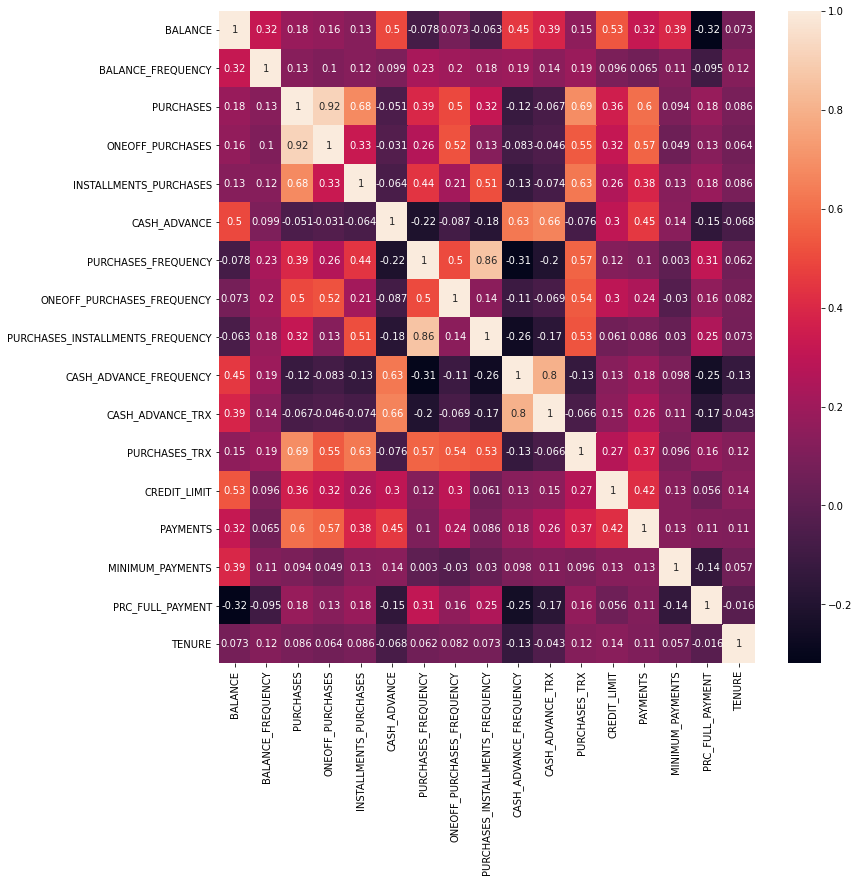

In [16]:
correlations = cc.corr()
f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlations, annot = True)

### K-Means and Elbow Methods

In [17]:
scaler = StandardScaler()
cc_scaled = scaler.fit_transform(cc)

In [18]:
cc_scaled.shape

(8950, 17)

In [19]:
cc_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

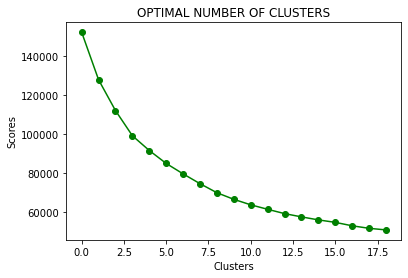

In [20]:
kmeans_score = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(cc_scaled)
  kmeans_score.append(kmeans.inertia_) 

plt.plot(kmeans_score, 'go-')
plt.title('OPTIMAL NUMBER OF CLUSTERS')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [21]:
kmeans = KMeans(8)
kmeans.fit(cc_scaled)
labels = kmeans.labels_

In [22]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [cc.columns])
cluster_centers    

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.018222,0.464677,2.494605,1.820826,2.553315,-0.156675,1.161066,1.575282,1.266153,-0.278703,-0.146364,3.091716,1.294520,1.446572,0.373038,0.259391,0.337847
1,-0.698229,-2.132395,-0.318238,-0.236661,-0.317581,-0.306524,-0.567315,-0.433735,-0.462734,-0.483149,-0.358074,-0.428114,-0.215265,-0.223704,-0.255581,0.250288,-0.163367
2,-0.396460,0.306952,-0.063491,-0.256889,0.321779,-0.359087,0.976348,-0.410826,1.169803,-0.458259,-0.355718,0.134493,-0.322294,-0.242822,-0.107892,0.355305,-0.027186
3,-0.004175,0.372131,-0.362212,-0.245234,-0.405824,-0.070725,-0.874297,-0.402326,-0.772676,0.150248,-0.016800,-0.490624,-0.335196,-0.264396,-0.052655,-0.454555,-0.007556
4,-0.120231,0.394967,0.516475,0.640218,0.044859,-0.327366,0.956205,1.832091,0.178221,-0.403473,-0.326635,0.595210,0.425526,0.125129,-0.155444,0.398699,0.201744
5,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409
6,1.586624,0.373740,-0.227771,-0.160615,-0.243551,1.977335,-0.479583,-0.206818,-0.428209,1.936772,1.879412,-0.279667,0.970409,0.760136,0.356772,-0.389932,-0.097983
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


In [23]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [cc.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3683.817168,0.987348,6332.966694,3614.634778,2719.998583,650.317300,0.956343,0.672395,0.867639,0.079373,2.250000,91.558333,9204.444444,5920.827321,1733.555098,2.295820e-01,11.969444
1,111.170530,0.372126,323.283526,199.628938,123.883072,336.076447,0.262660,0.073066,0.180535,0.038461,0.805235,4.068514,3711.227016,1085.543450,268.586773,2.269195e-01,11.298691
2,739.276619,0.949985,867.554272,166.054088,702.048314,225.849537,0.882206,0.079900,0.829347,0.043442,0.821314,18.052825,3321.813681,1030.198938,612.769570,2.576351e-01,11.480937
3,1555.784455,0.965425,229.332563,185.399461,44.086115,830.557239,0.139453,0.082436,0.057356,0.165210,3.134180,2.514756,3274.868451,967.743617,741.496247,2.076525e-02,11.507207
4,1314.224604,0.970835,2106.661171,1655.068574,451.632993,292.369590,0.874122,0.749006,0.435267,0.054405,1.019786,29.504534,6042.686802,2095.379363,501.951722,2.703271e-01,11.787304
5,4250.150569,0.984849,918.267222,146.178056,772.089167,976.903069,0.499369,0.044823,0.468645,0.084596,2.833333,20.166667,4476.388889,1357.092339,27995.061876,5.551115e-17,11.916667
6,4866.899785,0.965806,516.568350,325.850183,190.827843,5125.435581,0.297871,0.140760,0.194256,0.522712,16.074434,7.758360,8025.193684,3933.662344,1695.647583,3.966637e-02,11.386192
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,5.112058e-01,11.916667


In [24]:
labels.shape

(8950,)

In [25]:
labels.max()

7

In [26]:
labels.min()

0

In [27]:
cc_cluster = pd.concat([cc, pd.DataFrame({'CLUSTER':labels})], axis = 1)
cc_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


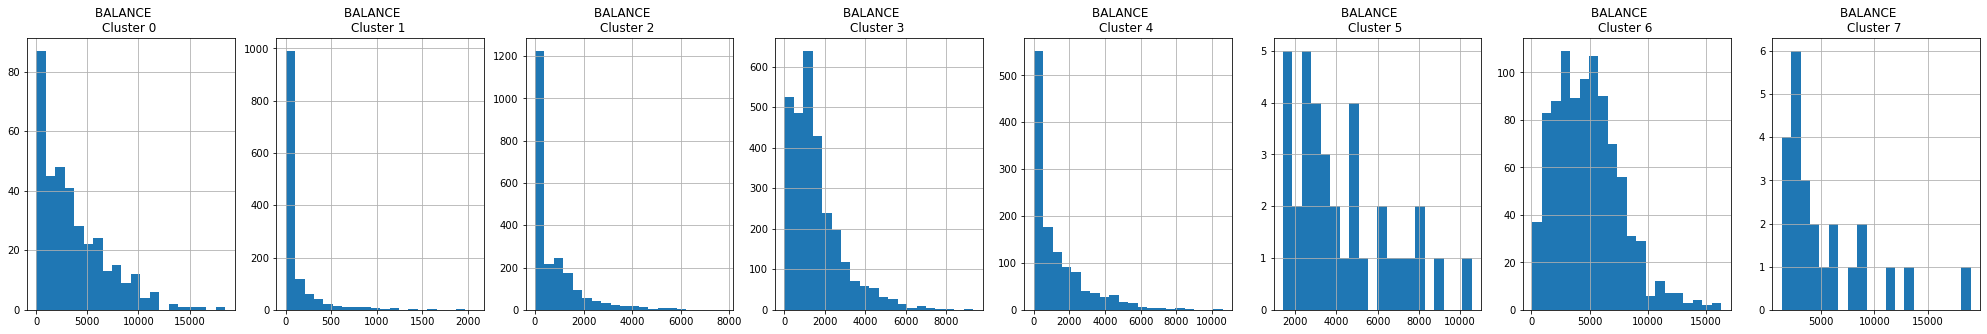

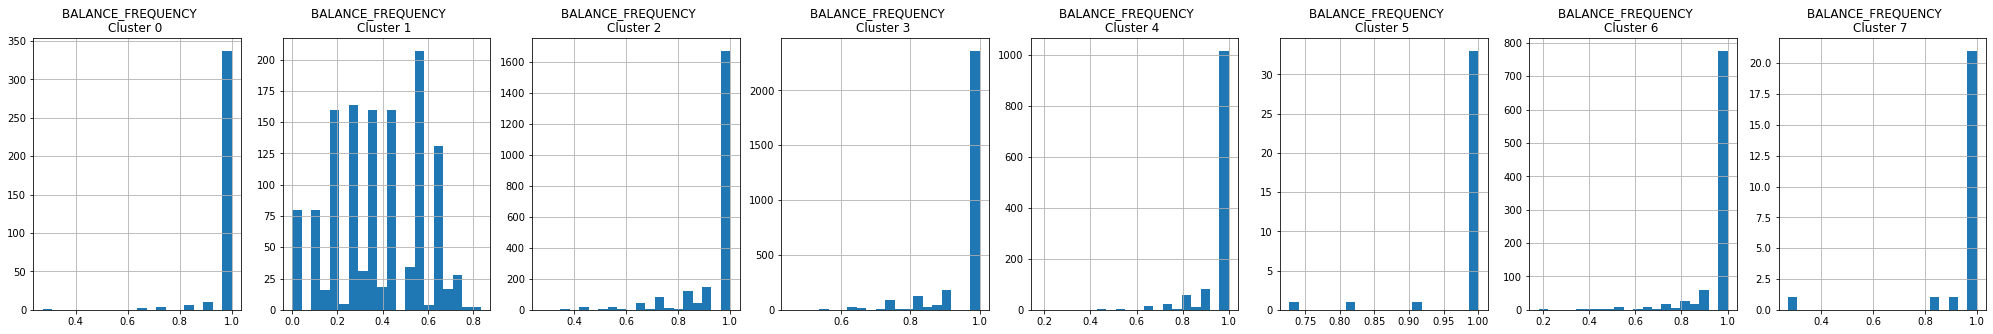

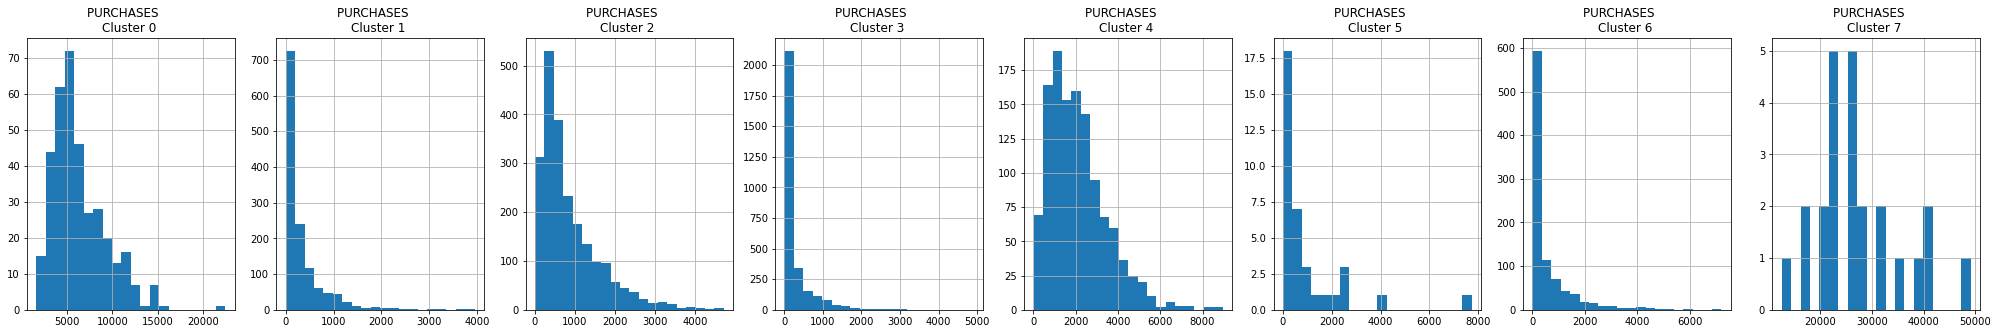

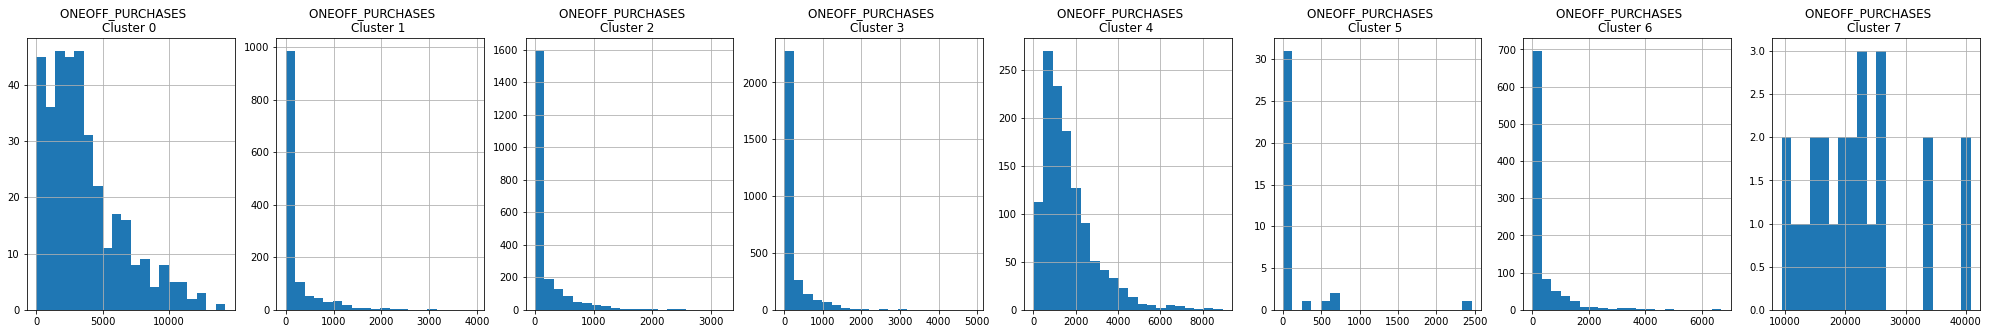

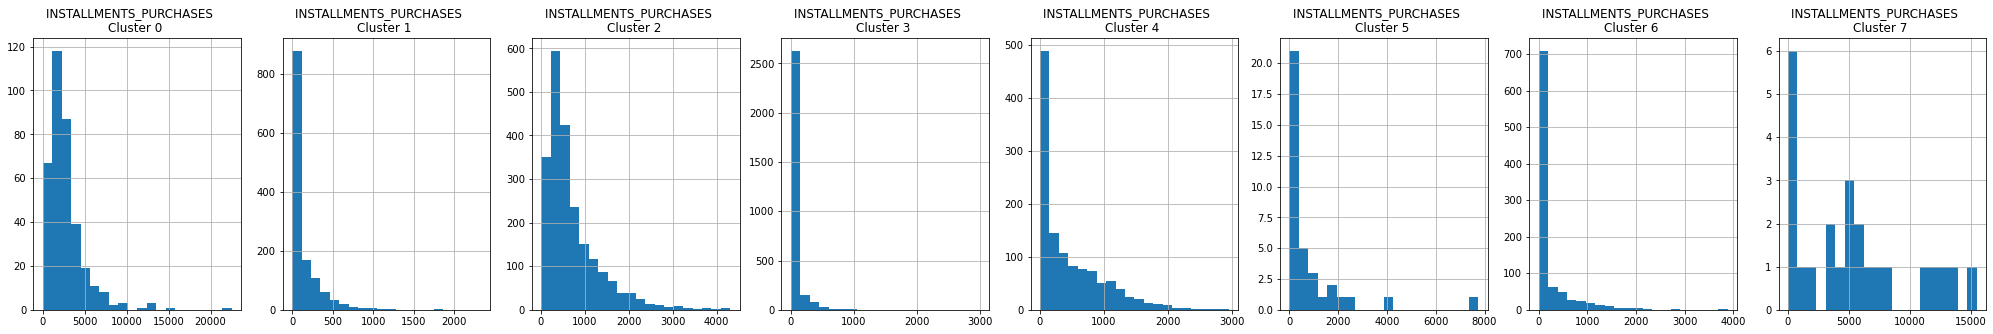

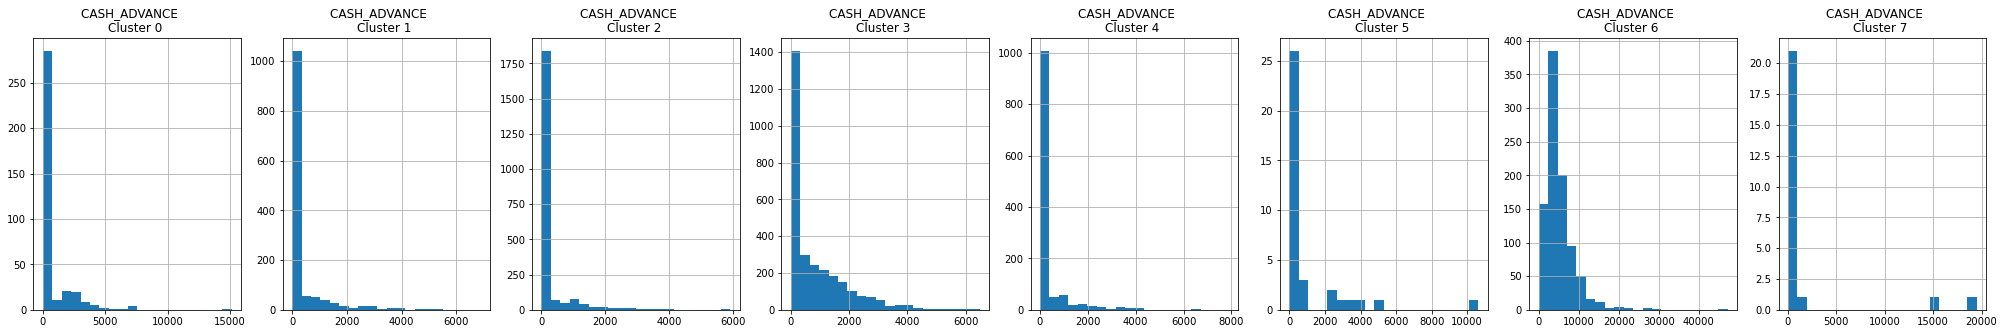

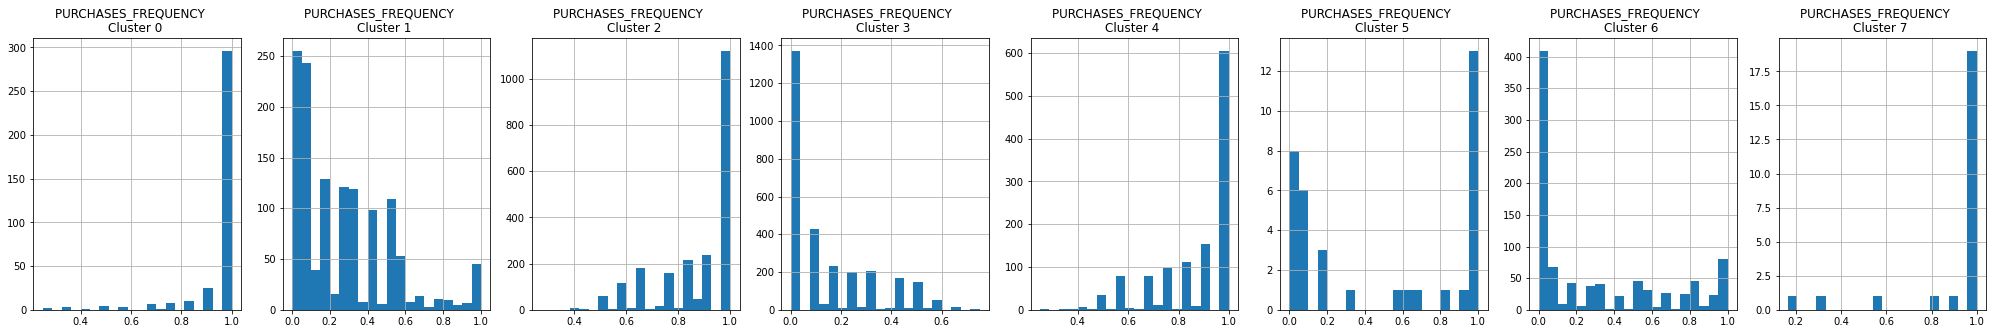

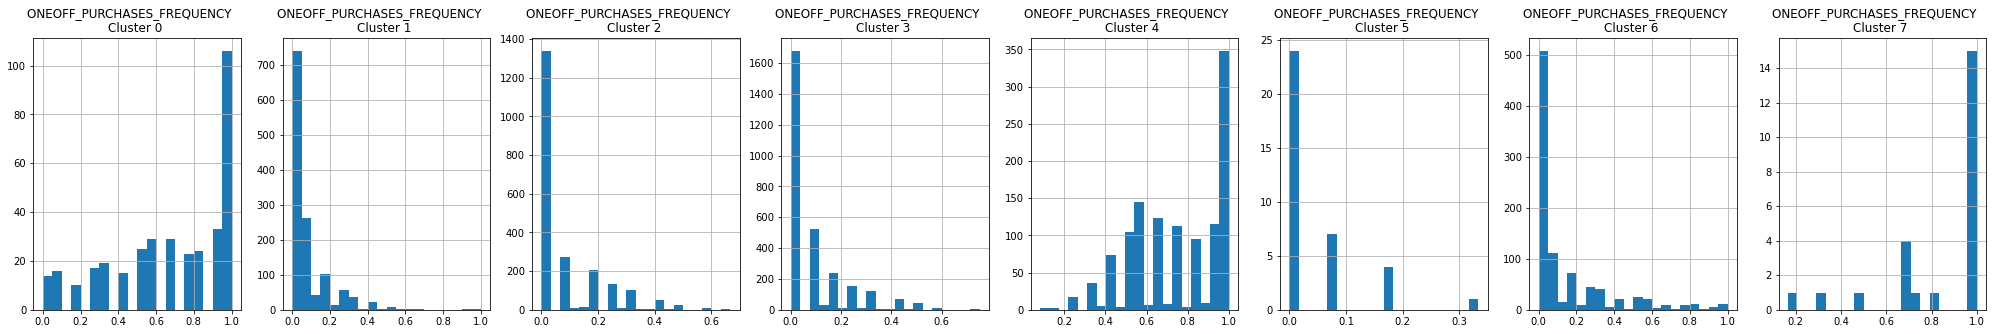

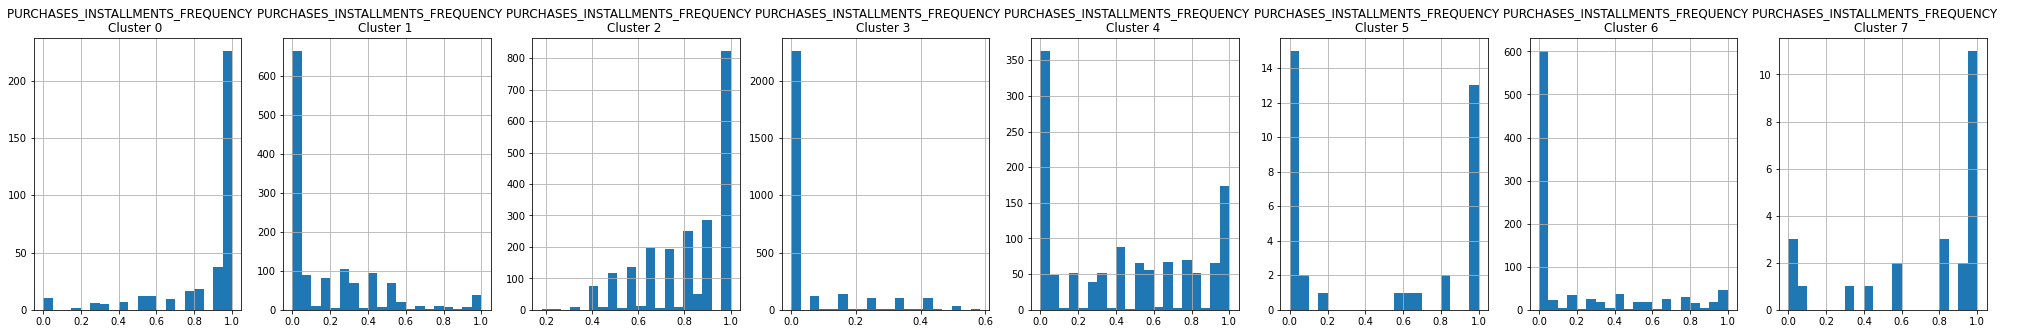

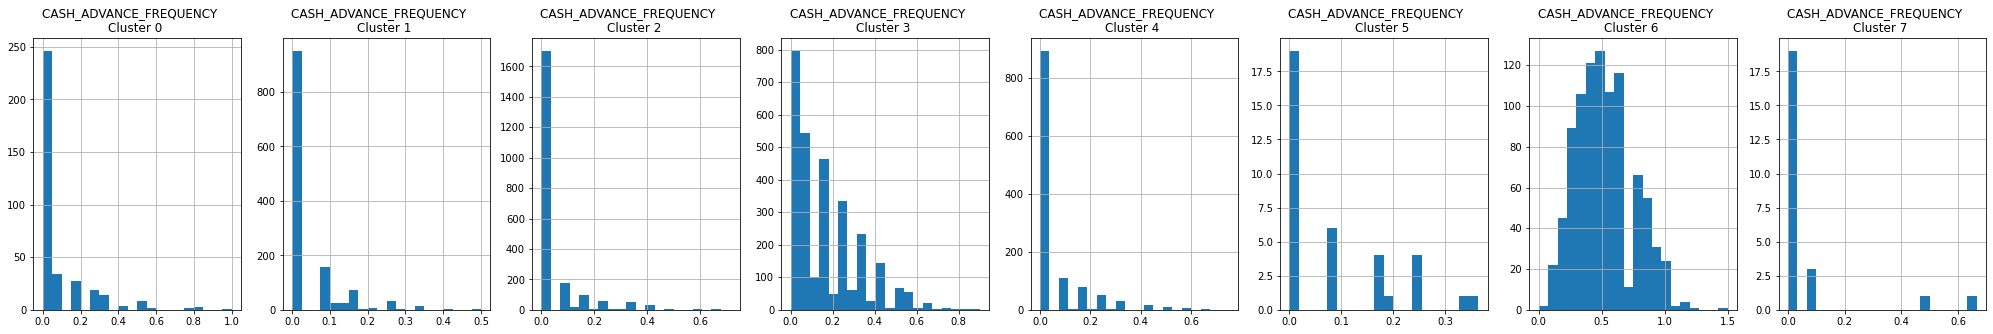

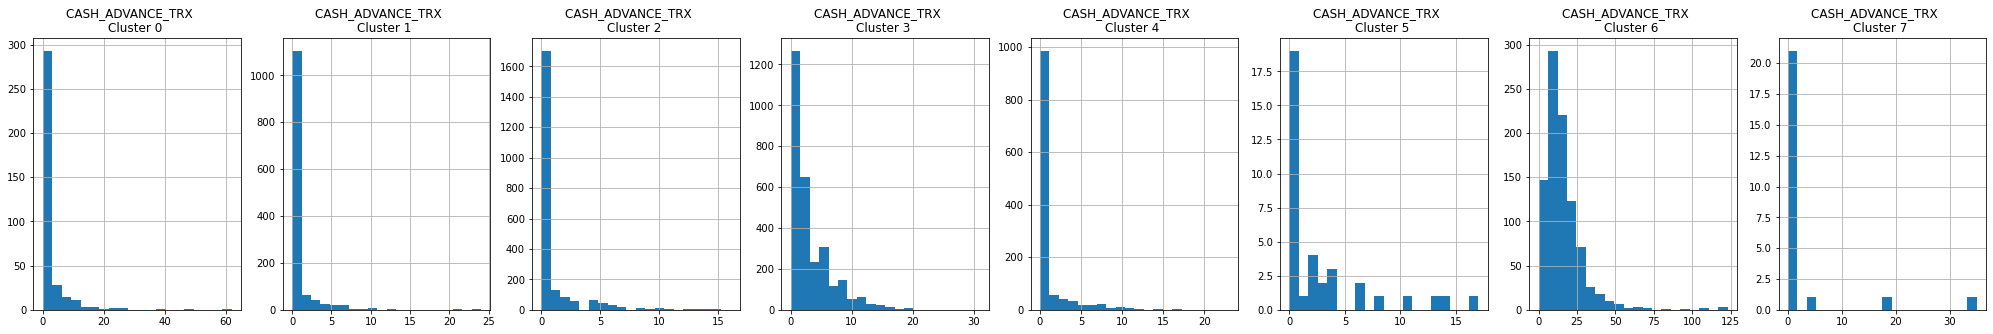

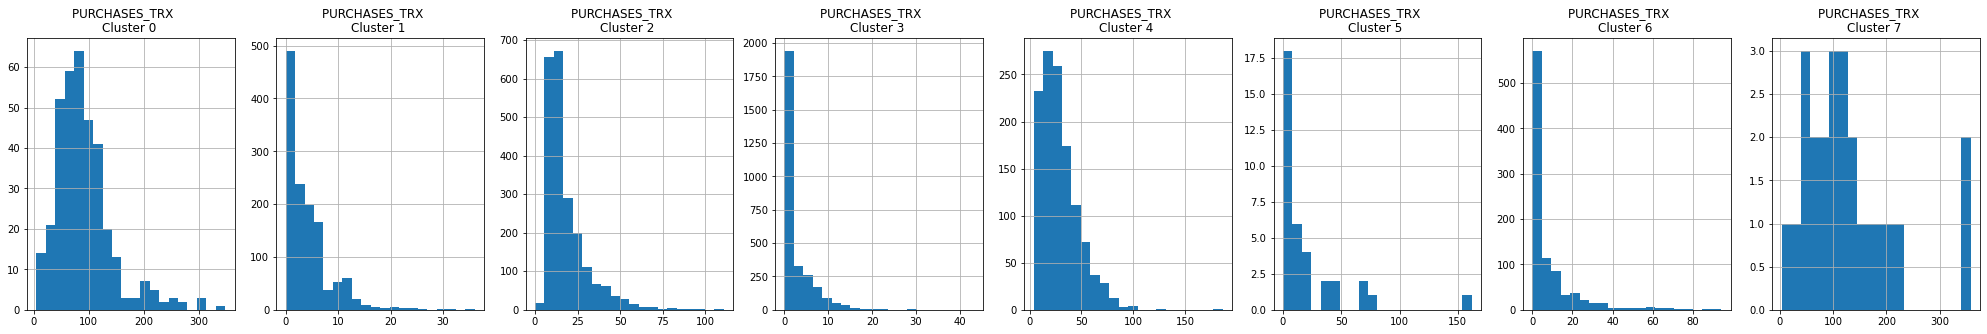

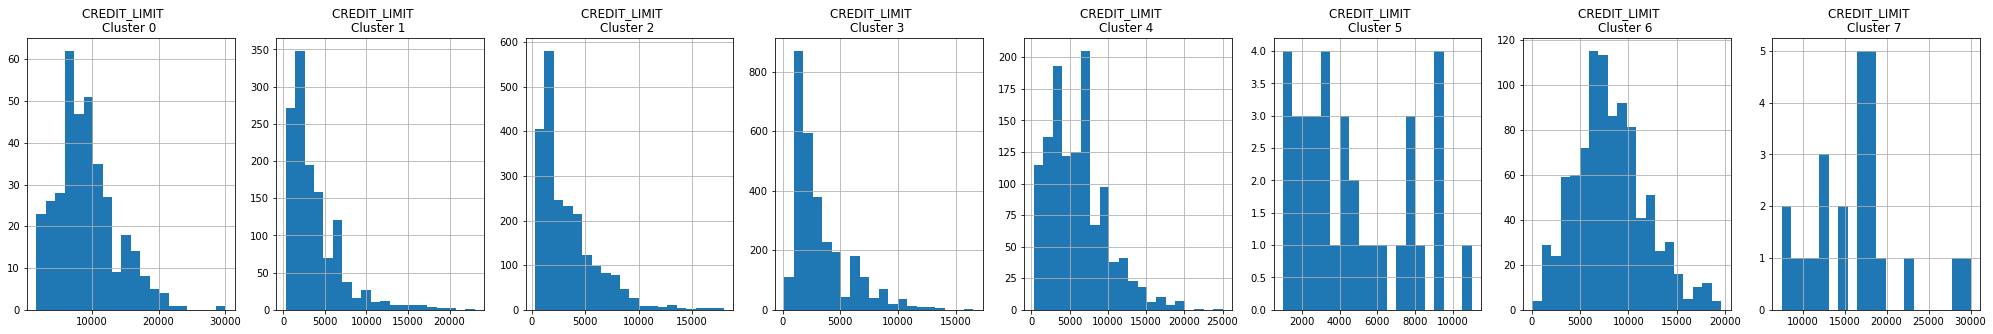

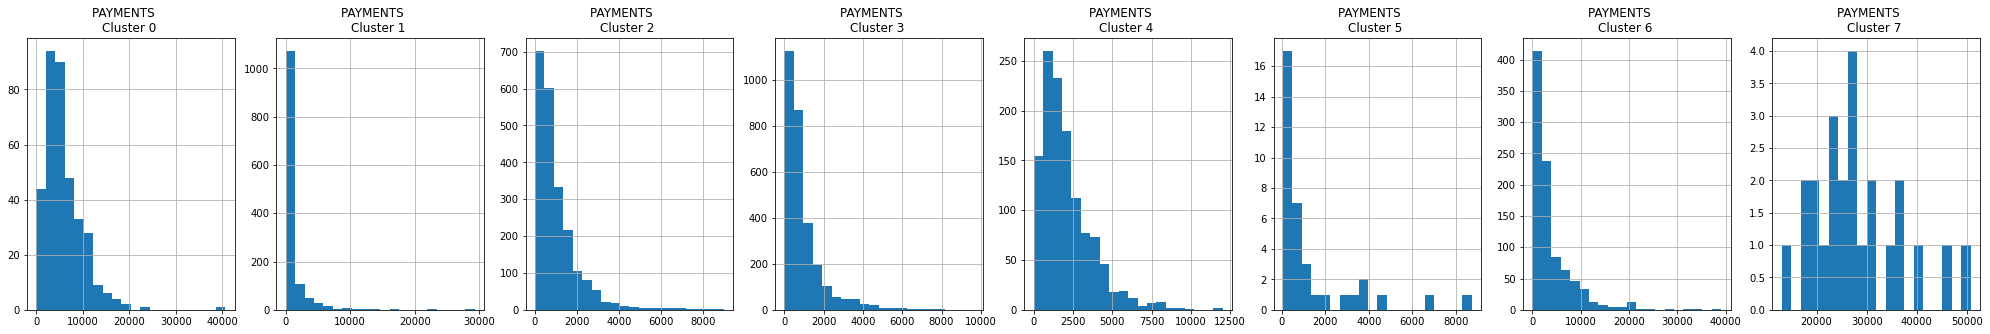

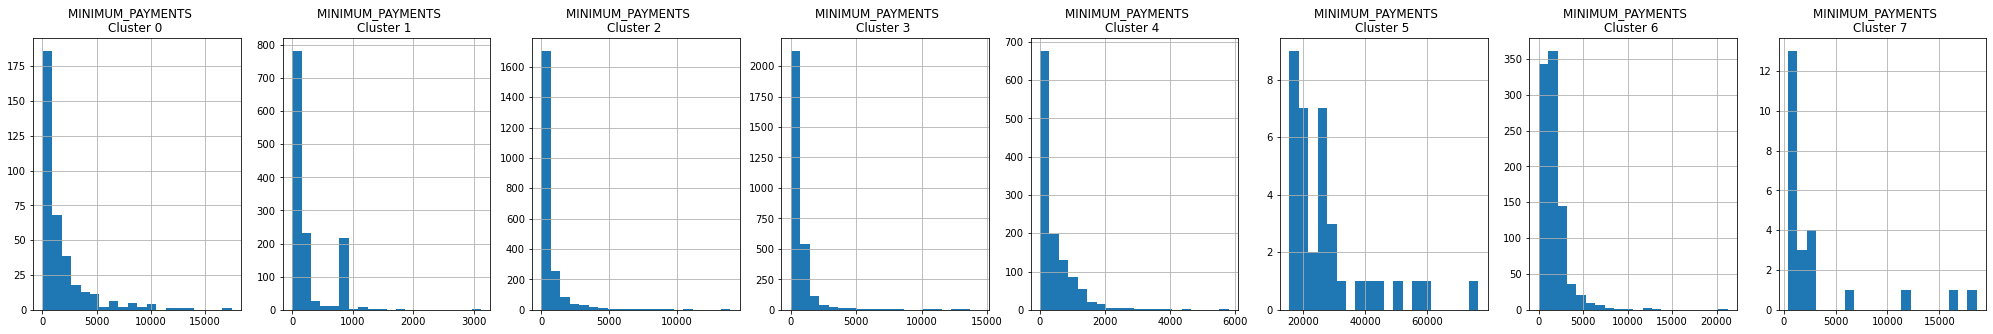

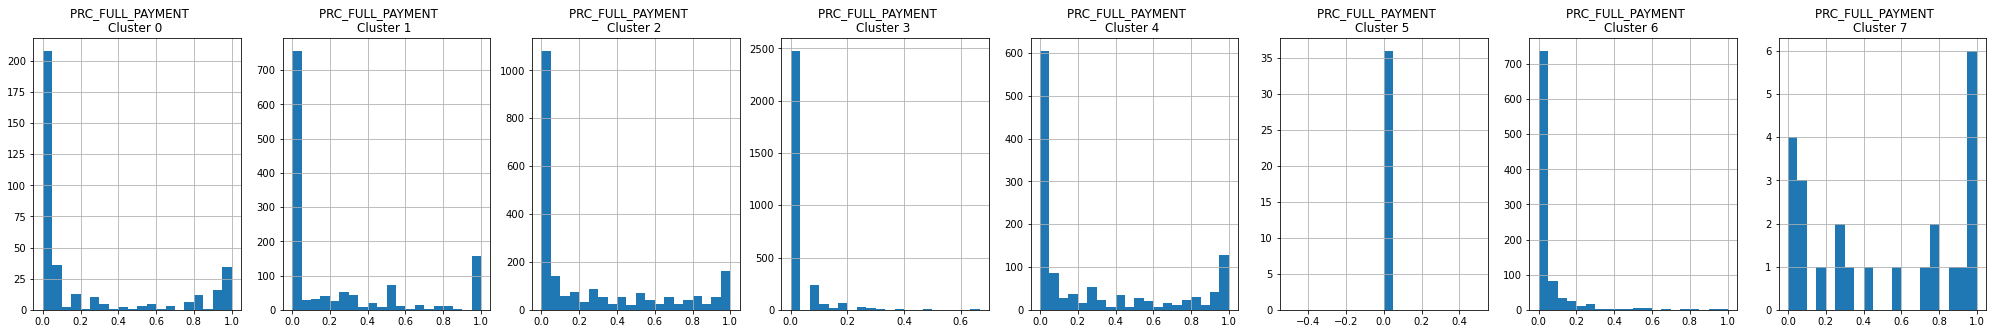

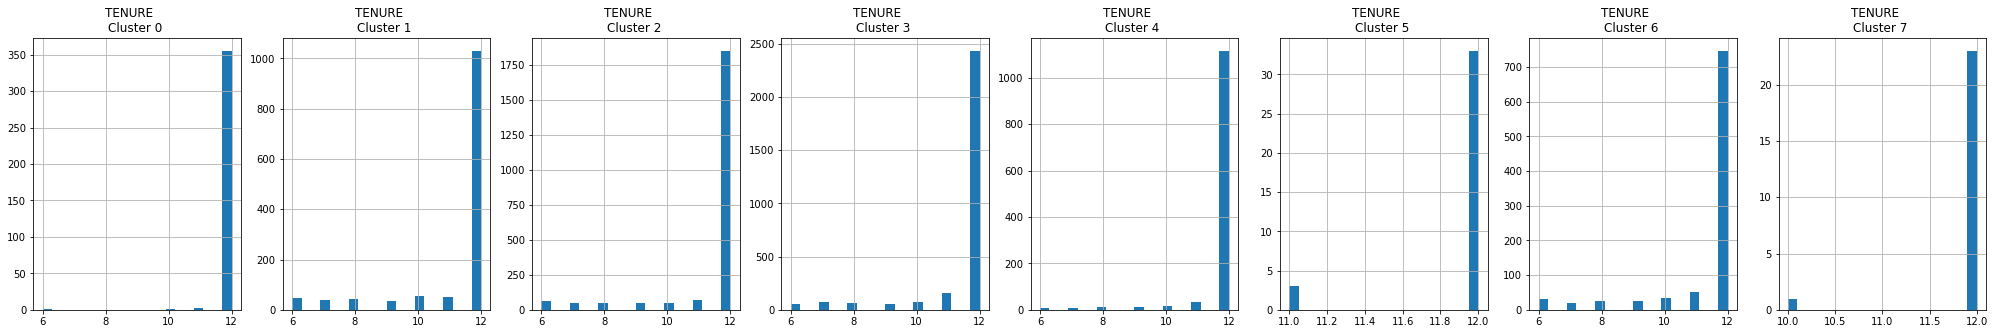

In [28]:
for i in cc.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = cc_cluster[cc_cluster['CLUSTER'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

### PRINCIPAL COMPONENT ANALYSIS (PCA)

In [29]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(cc_scaled)
pca_data = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_data.head()

,pca1,pca2
0,-1.682220,-1.076449
1,-1.138293,2.506472
2,0.969684,-0.383536
3,-0.873627,0.043167
4,-1.599434,-0.688578


In [30]:
pca_data = pd.concat([pca_data, pd.DataFrame({'cluster':labels})], axis = 1)
pca_data.head()

,pca1,pca2,cluster
0,-1.682220,-1.076449,3
1,-1.138293,2.506472,6
2,0.969684,-0.383536,4
3,-0.873627,0.043167,3
4,-1.599434,-0.688578,3


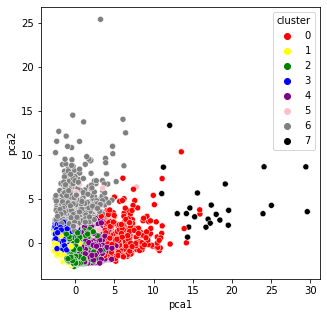

In [31]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_data, palette =['red','yellow', 'green','blue','purple','pink','gray', 'black'])
plt.show()

### Reduce Dimensionality Using Autoencoders

In [32]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_data = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_data)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)
encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_data, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_data, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


Using TensorFlow backend.


In [33]:
cc_scaled.shape

(8950, 17)

In [34]:
autoencoder.fit(cc_scaled, cc_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 4s 456us/sample - loss: 0.5168
Epoch 2/25
8950/8950 [==============================] - 3s 359us/sample - loss: 0.2909
Epoch 3/25
8950/8950 [==============================] - 3s 330us/sample - loss: 0.2394
Epoch 4/25
8950/8950 [==============================] - 3s 328us/sample - loss: 0.1920s - loss: 0.
Epoch 5/25
8950/8950 [==============================] - 3s 309us/sample - loss: 0.1773
Epoch 6/25
8950/8950 [==============================] - 3s 309us/sample - loss: 0.1604
Epoch 7/25
8950/8950 [==============================] - 3s 322us/sample - loss: 0.1408
Epoch 8/25
8950/8950 [==============================] - 3s 318us/sample - loss: 0.1251
Epoch 9/25
8950/8950 [==============================] - 3s 310us/sample - loss: 0.1261
Epoch 10/25
8950/8950 [==============================] - 3s 323us/sample - loss: 0.1146
Epoch 11/25
8950/8950 [==============================] - 3s 318us/sample - loss: 0.1115
Epoch 1

In [35]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [36]:
prediction = encoder.predict(cc_scaled)

In [37]:
prediction.shape

(8950, 10)